In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
x, y = mnist['data'], mnist['target']

In [5]:

y.shape

(70000,)

In [6]:
x.shape

(70000, 784)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [70]:
some_digit = x[36011]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

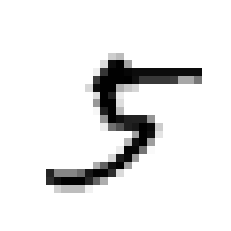

In [71]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [11]:
y[3601]

'8'

In [12]:
x_train, x_test = x[:60000], x[60000:]

In [13]:
y_train, y_test = y[:60000], y[60000:]

In [14]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [15]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression( solver='lbfgs')

In [18]:
clf.fit(x_train, y_train_2)

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
clf.predict([some_digit])

array([False])

In [45]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2,cv=3, scoring ='accuracy')

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 679, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positional argument: 'y'

  warnings.warn(some_fits_failed_message, FitFailedWarning)


In [47]:
a.mean()

nan

## Precision, Recall, F1-score

In [46]:
from sklearn.model_selection import cross_val_predict
y__train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [24]:
y__train_pred

array([False, False, False, ..., False,  True, False])

## Calculating Confusion

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train_2,y__train_pred)

array([[53560,   482],
       [  830,  5128]], dtype=int64)

## Precision & Recall

In [27]:
from sklearn.metrics import precision_score, recall_score

In [28]:
precision_score(y_train_2,y__train_pred)

0.9140819964349376

In [29]:
recall_score(y_train_2,y__train_pred)

0.860691507217187

In [30]:
from sklearn.metrics import f1_score
f1_score(y_train_2,y__train_pred)

0.8865836791147994

## Ploting cure P-R

In [31]:
from sklearn.metrics import precision_recall_curve

In [32]:
y_scores = cross_val_predict(clf, x_train, y_train_2, method ='decision_function')

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [42]:
y_scores

array([-12.54977954, -11.94681365, -13.14735186, ..., -18.0909801 ,
         2.75340573, -12.81528167])

In [33]:
precision , recalls, thresholds = precision_recall_curve(y_train_2,y_scores)

In [34]:
precision

array([0.10084802, 0.1008328 , 0.1008345 , ..., 1.        , 1.        ,
       1.        ])

In [35]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [36]:
thresholds

array([-24.30970279, -24.30375434, -24.30227704, ...,  16.75907246,
        18.99110053,  19.15637698])

(0.0, 1.0)

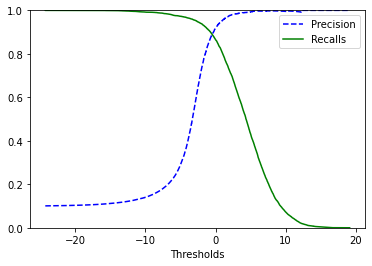

In [37]:
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recalls')
plt.xlabel('Thresholds')
plt.legend()
plt.ylim([0,1])

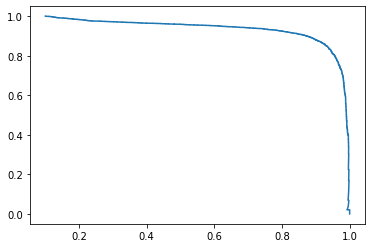

In [39]:
plt.plot(precision,recalls)

In [41]:
from sklearn.metrics import roc_curve

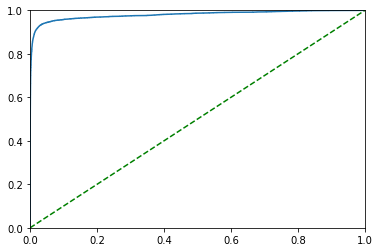

In [58]:
fpr, tpr, thresholds = roc_curve(y_train_2,y_scores)
plt.plot(fpr, tpr )
plt.plot([0,1] ,'g--')
plt.ylim([0,1])
plt.xlim([0,1])


## OVA Strategy

In [59]:
from sklearn.linear_model import SGDClassifier

In [60]:
sgd_clf = SGDClassifier()

In [61]:
sgd_clf.fit(x_train,y_train)


SGDClassifier()

In [72]:
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [73]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [74]:
some_digit_scores

array([[ -7495.98540553, -14125.19793523,  -6703.70293165,
         -9972.8264627 , -11073.12369101,   2796.39208446,
        -41597.95388244,   -935.48681172,  -5384.02752777,
         -4771.56645404]])

In [75]:
np.argmax(some_digit_scores) #max score gain by classifier from 10

5

In [76]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

## Forcing for OVO

In [78]:
from sklearn.multiclass import OneVsOneClassifier

In [82]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [83]:
ovo_clf.fit(x_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [84]:
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [85]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [86]:
len(ovo_clf.estimators_)

45

## Random Forest Classifier decision

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfc_clf = RandomForestRegressor()

In [ ]:
rfc_clf.fit(x_train,y_train)

In [ ]:
rfc_clf.predict([some_digit])